# R3 Internal lab - Supervised Learning 


# Building a Student Performace Prediction System



The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?
Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance

# Question 1 - Exploring the Data
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame as df
import seaborn as sns
student=pd.read_csv("students-data.csv", sep=';')

In [2]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

# Question 2 - drop missing values 
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*
*Use .dropna() function to drop the NAs*

#### Answer:

In [3]:
student.index.name= "number"
student.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


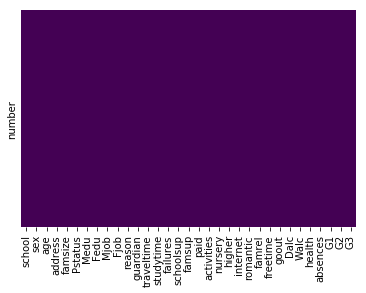

In [4]:
sns.heatmap(student.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Transform Data

## Question 3 

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [5]:
student.select_dtypes(exclude='number').head()

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
number,,,,,,,,,,,,,,,,,
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no


# Question 4 - Drop variables with less variance 

*Find the variance of each numerical independent variable and drop whose variance is less than 1. Use .var function to check the variance*

In [6]:
student.var() 

age            1.628285
Medu           1.198445
Fedu           1.184180
traveltime     0.486513
studytime      0.704324
failures       0.553017
famrel         0.803997
freetime       0.997725
goout          1.239388
Dalc           0.793420
Walc           1.658678
health         1.932944
absences      64.049541
G1            11.017053
G2            14.148917
G3            20.989616
dtype: float64

In [7]:
student.shape

(395, 33)

In [8]:
 student.drop(student.var()[student.var() < 1].index.values, axis=1, inplace = True)

In [9]:
student.shape

(395, 27)

#### Variables with less variance are almost same for all the records. Hence, they do not contribute much for classification.

# Question 5 - Encode all categorical variables to numerical 

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [10]:
student.shape

(395, 27)

In [11]:
student.select_dtypes(exclude='number').head().columns

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

In [12]:
from sklearn.preprocessing import LabelEncoder
lb_Make = LabelEncoder()

In [13]:
student[['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic']] = student [['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic']].apply(lambda col : lb_Make.fit_transform(col))

In [14]:
student.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,18,1,0,0,4,4,0,4,...,1,0,0,4,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,1,1,0,3,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,1,1,0,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,2,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,1,0,0,2,2,5,4,6,10,10


In [15]:
student_mod = student
student_mod.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,18,1,0,0,4,4,0,4,...,1,0,0,4,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,1,1,0,3,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,1,1,0,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,2,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,1,0,0,2,2,5,4,6,10,10


# Question 6 - Convert the continuous values of grades into classes 

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [16]:
student_mod['G1'] = (student_mod['G1'] >= 10).astype(int)
student_mod['G2'] = (student_mod['G2'] >= 10).astype(int)
student_mod['G3'] = (student_mod['G3'] >= 10).astype(int)
student_mod.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,18,1,0,0,4,4,0,4,...,1,0,0,4,1,3,6,0,0,0
1,0,0,17,1,0,1,1,1,0,2,...,1,1,0,3,1,3,4,0,0,0
2,0,0,15,1,1,1,1,1,0,2,...,1,1,0,2,3,3,10,0,0,1
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,2,1,5,2,1,1,1
4,0,0,16,1,0,1,3,3,2,2,...,1,0,0,2,2,5,4,0,1,1
5,0,1,16,1,1,1,4,3,3,2,...,1,1,0,2,2,5,10,1,1,1
6,0,1,16,1,1,1,2,2,2,2,...,1,1,0,4,1,3,0,1,1,1
7,0,0,17,1,0,0,4,4,2,4,...,1,0,0,4,1,1,6,0,0,0
8,0,1,15,1,1,0,3,2,3,2,...,1,1,0,2,1,1,0,1,1,1


# Question 7 
*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate feature and target attributes into separate dataframes with X and y variable names.*

Answer

In [17]:
y= student_mod['G3']
y.head()

number
0    0
1    0
2    1
3    1
4    1
Name: G3, dtype: int32

In [18]:
X=student_mod.drop(['G3'] ,1)
X.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,nursery,higher,internet,romantic,goout,Walc,health,absences,G1,G2
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,18,1,0,0,4,4,0,4,...,1,1,0,0,4,1,3,6,0,0
1,0,0,17,1,0,1,1,1,0,2,...,0,1,1,0,3,1,3,4,0,0
2,0,0,15,1,1,1,1,1,0,2,...,1,1,1,0,2,3,3,10,0,0
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,1,2,1,5,2,1,1
4,0,0,16,1,0,1,3,3,2,2,...,1,1,0,0,2,2,5,4,0,1


# Question 8 - Training and testing data split

# *So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [19]:
from sklearn.model_selection import train_test_split
student_mod.shape

(395, 27)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.24, random_state=100)

In [21]:
X_train.shape

(300, 26)

# Question 9 - Model Implementation and Testing the Accuracy 

*Build a **LogisticRegression** classifier using **fit()** functions in sklearn. 
* You need to import both Logistic regression and accuracy score from sklearn*
#### Answer:

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [23]:
logmodel = LogisticRegression()
model = logmodel.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [24]:
predictions = logmodel.predict(X_test)

In [25]:
predictions

array([0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0])

results.score(X_train, y_train)

In [26]:
model.score(X_train, y_train)

0.9366666666666666

In [27]:
model.score(X_test, y_test)

0.8947368421052632

In [28]:
accuracy_score(y_test, model.predict(X_test))

0.8947368421052632

## Section 2 - K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Visualization

6.Transform the dataset for building machine learning model.

7.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Finding Optimal K value

11.Repeat 7,8,9 steps.

In [29]:
import warnings 
warnings.filterwarnings('ignore')

## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Question 1 - Import the data set and print 10 random rows from the data set

In [30]:
iris = pd.read_csv('iris.csv')
iris.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
24,25,4.8,3.4,1.9,0.2,Iris-setosa
37,38,4.9,3.1,1.5,0.1,Iris-setosa
77,78,6.7,3.0,5.0,1.7,Iris-versicolor
62,63,6.0,2.2,4.0,1.0,Iris-versicolor
146,147,6.3,2.5,5.0,1.9,Iris-virginica
99,100,5.7,2.8,4.1,1.3,Iris-versicolor
137,138,6.4,3.1,5.5,1.8,Iris-virginica
0,1,5.1,3.5,1.4,0.2,Iris-setosa
135,136,7.7,3.0,6.1,2.3,Iris-virginica
134,135,6.1,2.6,5.6,1.4,Iris-virginica


## Data Pre-processing

## Question 2 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median) *

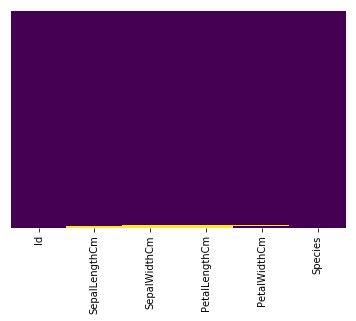

In [31]:
sns.heatmap(iris.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [32]:
iris_new= iris.fillna(iris.median())

In [33]:
iris_new.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


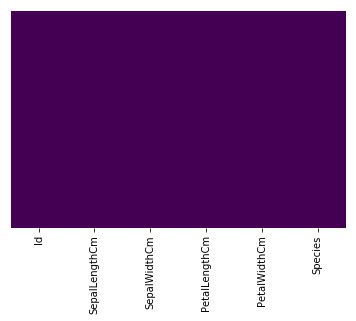

In [34]:
sns.heatmap(iris_new.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

In [35]:
iris_new.shape

(152, 6)

In [36]:
iris_new['Species'] = lb_Make.fit_transform(iris['Species'])

In [37]:
iris_new.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


## Question 4 - Observe the association of each independent variable with target variable 
Drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.

In [38]:
corr_matrix = iris_new.corr().abs()
corr_matrix

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,1.000000,0.702734,0.392693,0.872346,0.890676,0.942753
SepalLengthCm,0.702734,1.000000,0.109369,0.871120,0.815986,0.775061
SepalWidthCm,0.392693,0.109369,1.000000,0.420713,0.356510,0.417318
PetalLengthCm,0.872346,0.871120,0.420713,1.000000,0.962043,0.944477
PetalWidthCm,0.890676,0.815986,0.356510,0.962043,1.000000,0.952513
Species,0.942753,0.775061,0.417318,0.944477,0.952513,1.000000


Since no variables have co-relation between -0.1 to 0.1, none of the values are being dropped.

## Question 5 - Observe the independent variables variance 

drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [39]:
iris_new.var()

Id               1938.000000
SepalLengthCm       0.676645
SepalWidthCm        0.185552
PetalLengthCm       3.076516
PetalWidthCm        0.577141
Species             0.675322
dtype: float64

## Question 6 - Plot the scatter matrix for all the variables 

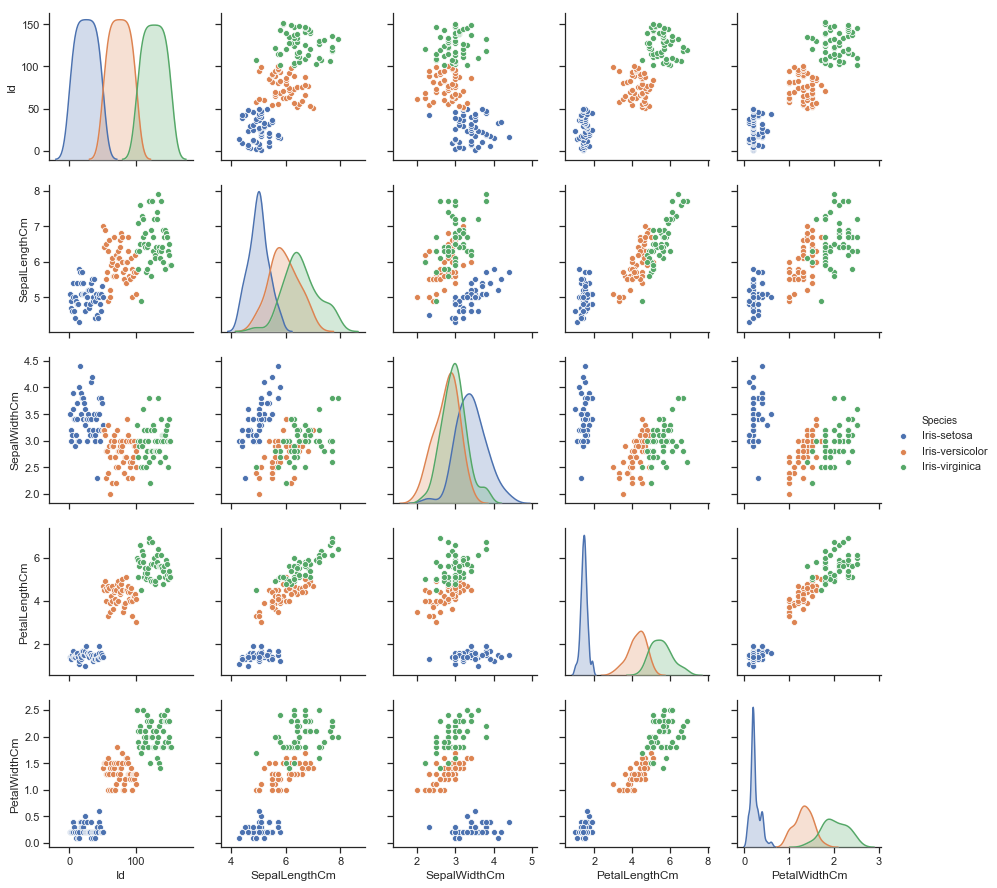

In [40]:
import seaborn as sns
sns.set(style="ticks")
sns.pairplot(iris, hue="Species")

## Split the dataset into training and test sets

## Question 7 - Split the dataset into training and test sets with 80-20 ratio

In [41]:
from sklearn.model_selection import train_test_split
iris_new.shape
iris_new = iris_new.drop('Id' , 1)

In [42]:
iris_new.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [43]:
v= iris_new['Species']
v.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int32

In [44]:
U=iris_new.drop(['Species'] ,1)
U.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [45]:
U_train, U_test, v_train, v_test = train_test_split(U, v, test_size=0.20, random_state=100)

In [46]:
U_train.shape

(121, 4)

## Question 8 - Model 

*Build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [48]:
def run_KNN(k_values):
    mse = []
    mse_lowest = 1.0
    for k in k_values:
        NNH = KNeighborsClassifier(n_neighbors= k , metric='euclidean')
        NNH.fit(U_train, v_train)
        predict_labels = NNH.predict(U_train)
        accuracy_score = metrics.accuracy_score(v_train, predict_labels)
        print("Accuracy Score for k = %1.0f" %k, "is %1.3f"%(accuracy_score*100), "%")
        mse_val = 1 - accuracy_score
        mse.append(mse_val)
        print("Misclassification Error for k = %1.0f" %k, "is %1.3f"%(mse_val), "%\n ")
        
        if mse_val < mse_lowest:
            mse_lowest = mse_val
            k_lowest = k
            
    print('Model with lowest MSE has a value of %1.3f' %(mse_lowest), " and the best model award goes to k=%1.0f" %(k_lowest))     
    return mse

In [49]:
mse = run_KNN([3,5,9])

Accuracy Score for k = 3 is 95.041 %
Misclassification Error for k = 3 is 0.050 %
 
Accuracy Score for k = 5 is 95.868 %
Misclassification Error for k = 5 is 0.041 %
 
Accuracy Score for k = 9 is 95.868 %
Misclassification Error for k = 9 is 0.041 %
 
Model with lowest MSE has a value of 0.041  and the best model award goes to k=5


## Question 9 - Cross Validation 

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [50]:
k_values = []
for num in range(1, 20): 
    if num % 2 != 0:
        k_values.append(num)
        
k_values

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

In [51]:
mse = run_KNN(k_values)

Accuracy Score for k = 1 is 100.000 %
Misclassification Error for k = 1 is 0.000 %
 
Accuracy Score for k = 3 is 95.041 %
Misclassification Error for k = 3 is 0.050 %
 
Accuracy Score for k = 5 is 95.868 %
Misclassification Error for k = 5 is 0.041 %
 
Accuracy Score for k = 7 is 95.868 %
Misclassification Error for k = 7 is 0.041 %
 
Accuracy Score for k = 9 is 95.868 %
Misclassification Error for k = 9 is 0.041 %
 
Accuracy Score for k = 11 is 95.868 %
Misclassification Error for k = 11 is 0.041 %
 
Accuracy Score for k = 13 is 96.694 %
Misclassification Error for k = 13 is 0.033 %
 
Accuracy Score for k = 15 is 95.868 %
Misclassification Error for k = 15 is 0.041 %
 
Accuracy Score for k = 17 is 96.694 %
Misclassification Error for k = 17 is 0.033 %
 
Accuracy Score for k = 19 is 95.041 %
Misclassification Error for k = 19 is 0.050 %
 
Model with lowest MSE has a value of 0.000  and the best model award goes to k=1


## Question 10 - Plot

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

In [52]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Misclassification Error')

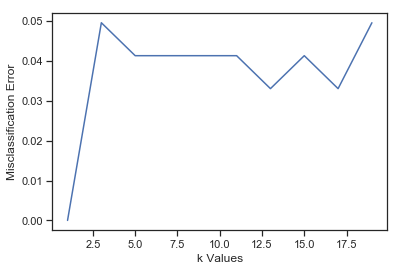

In [53]:
plt.plot(k_values, mse)
plt.xlabel('k Values')
plt.ylabel('Misclassification Error')

## Section 3 - Optional - Naive Bayes with Iris Data

The below section is optional and will not be graded


In [ ]:
#Load all required library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

Problem statement
Dataset
The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

Attributes of the dataset: https://archive.ics.uci.edu/ml/datasets/Iris

### Load the iris data set 

### Slice  Iris data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [ ]:
#Check the dataset
print(y)
print(X)

# Question 1 
Find the distribution of target variable (Class)

And, Plot the distribution of target variable using histogram

# Question 2 
Find Correlation among all variables and give your insights

### Split data in Training and test set in 80:20.

# Question 3 
Do Feature Scaling 

In [ ]:
# Use StandardScaler or similar methods

# Question 4 
Train and Fit NaiveBayes Model

In [ ]:
#Fit the model

In [ ]:
#Predict

# Question 5 
Print Accuracy and Confusion Matrix and Conclude your findings

In [ ]:
# show Confusion Matrix

In [ ]:
# show accuracy

In [ ]:
#Show precision and Recall metrics